## In this notebook we investigate the UrbanSound8k Dataset

In [1]:
#import needed libraries

import librosa as lb #used for feature extracion and resampling
import numpy as np 
import matplotlib.pyplot as plt
import librosa.display #builds on matplotlib to draw nice spectrograms.
#import IPython.display as ipd #used to play .wav files from notebook
import pandas as pd 
# from scipy.io import wavfile #can be used to import .wav files but does not work on 24 bit depth audio files


import soundfile as sf #soundfile enables loading 24 bit depth audio files.
#import time #used to measure code runtime. 
#import glob
#from collections import defaultdict
import pickle
#import seaborn as sns
#from collections import defaultdict
#import scipy
import urbanNoises

In [2]:
info=pd.read_csv('Data/UrbanSound8K.csv')
info.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


## Sampling rate distribution

In [5]:
SR=np.zeros(len(info))
dataDir='../Cap1/AllData/UrbanSound8K/audio/fold'

for i in range(len(info)):

    filename = dataDir + str(info['fold'][i]) + '/' + info['slice_file_name'][i]
    _,sr=sf.read(filename)
    SR[i]=sr

info['SR']=SR
info.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class,SR
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark,44100.0
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing,44100.0
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing,44100.0
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing,44100.0
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing,44100.0


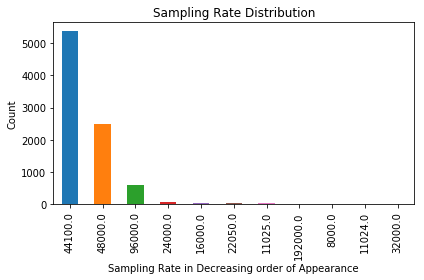

In [27]:
info.SR.value_counts().plot(kind='bar')
plt.xlabel('Sampling Rate in Decreasing order of Appearance')
plt.ylabel('Count')
plt.title('Sampling Rate Distribution')
plt.tight_layout()
plt.savefig('plots/SamplingRateDistribution.png')
plt.show()


## Duration Distribution

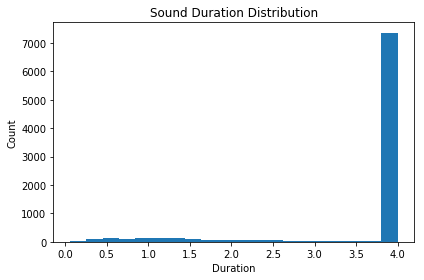

In [33]:
info['Duration']=info.apply(lambda row: row.end-row.start,axis=1)
info.Duration.plot(kind='hist',bins=20)
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Sound Duration Distribution')
plt.tight_layout()
plt.savefig('plots/SoundDurationDistribution')

# Proportion of Sounds with duration less than 4s per class.

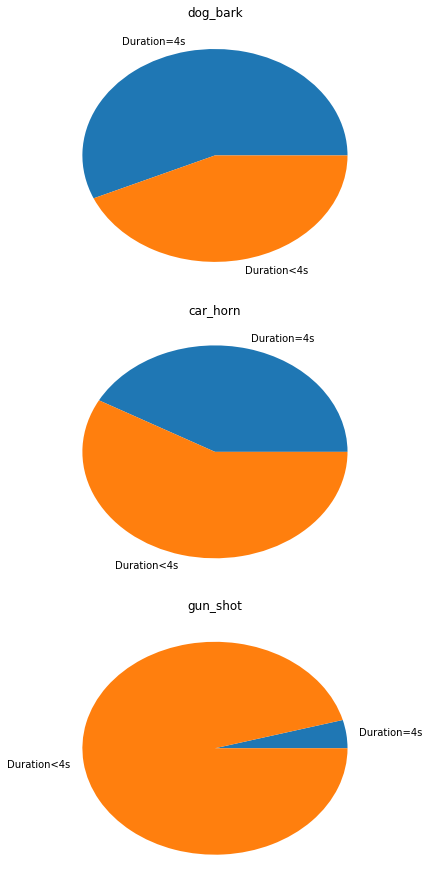

In [65]:
classes=info['class'].unique()

f, axs = plt.subplots(3,1,figsize=(5,12.5))

for i, label in enumerate(['dog_bark','car_horn','gun_shot']):
    classInfo=info[info['class']==label]
    ratio4=np.sum((classInfo['Duration'].values==4))/len(classInfo)
    plt.subplot(3,1,i+1)
    plt.pie([ratio4,1-ratio4],labels=['Duration=4s','Duration<4s'])
    plt.title(label)
    plt.tight_layout()

plt.savefig('plots/DurationDistributionPerClass')
plt.show()